In [5]:
import copy
import time
import numpy as np
from neural_network_for_simple_eq import NNTrain, get_p
import nn_functions_for_simple_eq as nn
from nn_functions_for_simple_eq import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p
from itertools import product

In [6]:
a = NNTrain(nx=60, bx=300, hidden_nodes=10, alpha=1e-3, bc=1, batch_size=32)

In [3]:
a.points.shape

(3364, 2)

In [3]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [ ]:
bc_multiplier = 5
thresh = 5e-7

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-9  or a.bc > 100000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [16]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, nx=1000))
print('number of iterations', len(a.cost_rate))

alpha: 2.5600000000000007e-09
BC: 390625
relative error: 0.03521553980648959
number of iterations 368300


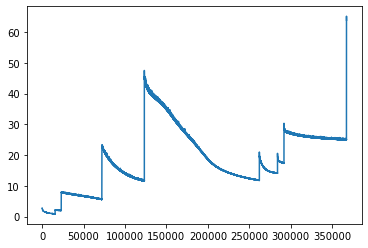

In [17]:
plot_iteration(a.cost_rate, min_it=1000)

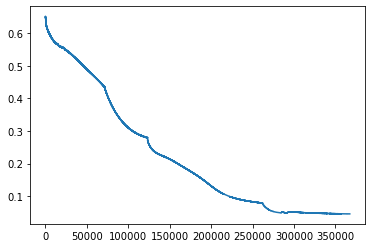

In [18]:
plot_iteration(a.rel_err, min_it=1000)

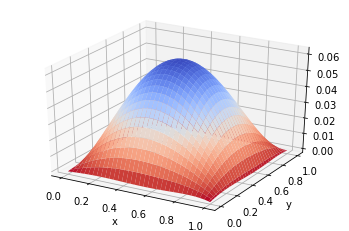

In [19]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

In [ ]:
plot_fun(nn.psi_a)

In [20]:
rel_err_for_p = []

for i in range(len(p)):
    rel_err_for_p.append(rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=100))

In [21]:
len(p)

3684

In [22]:
rel_err_for_p = np.array(rel_err_for_p)

In [23]:
np.where(rel_err_for_p==np.amin(rel_err_for_p))[0][0], np.amin(rel_err_for_p)

(2851, 0.03596219475592646)

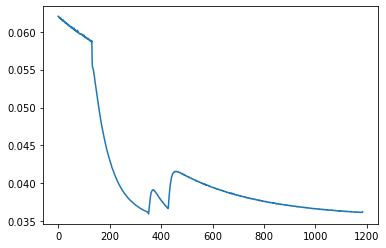

In [26]:
plot_iteration(rel_err_for_p, min_it=2500)

In [27]:
i=2851
rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=1000)

0.034498690475958556

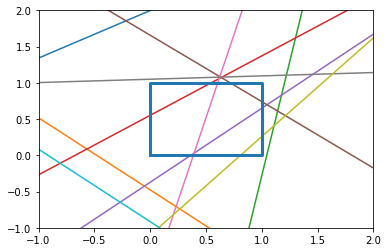

In [28]:
animate_p(p[:2851], 'simple_h10.mp4')

In [8]:
rel_err_for_p = []

for i in range(len(p)):
    rel_err_for_p.append(rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=100))

In [9]:
rel_err_for_p = np.array(rel_err_for_p)

In [10]:
np.where(rel_err_for_p==np.amin(rel_err_for_p))[0][0], np.amin(rel_err_for_p)

(2851, 0.03596219475592646)

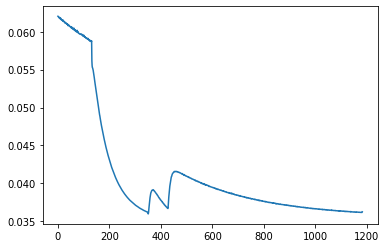

In [11]:
plot_iteration(rel_err_for_p, min_it=2500)

In [16]:
i=2851
rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], nx=1000)

0.034498690475958556

In [20]:
for weight in p[i][2]:
    print(f'{weight:.20f}')

1.26269839854303267401
0.89289162867109650445
-2.02795728099013672363
2.52316440617415072012
-1.16961762593841589464
-2.20230780056645425447
-0.07124171916240100433
1.78694881166765773273
1.06190643133575401968
-1.22218904301148323377


### Load parameters

In [7]:
name_str = '20200926-1840_simp_eq_1_final'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']
p = np.load('output/' + name_str + '_p_list.npz', allow_pickle=True)['arr_0']

In [30]:
output_name = 'simp_eq_1_final'
timestr = time.strftime("%Y%m%d-%H%M")

a.save_result(output_name)

np.savez('output/'+ timestr + '_' + output_name +'_p_list.npz', p)